In [2]:
# Regularized Linear Models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline

In [3]:
train = pd.read_csv("/Users/chidam/Desktop/ames_housing price_train.csv")
test = pd.read_csv("/Users/chidam/Desktop/ames_housing price_test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117236250>,
      dtype=object)

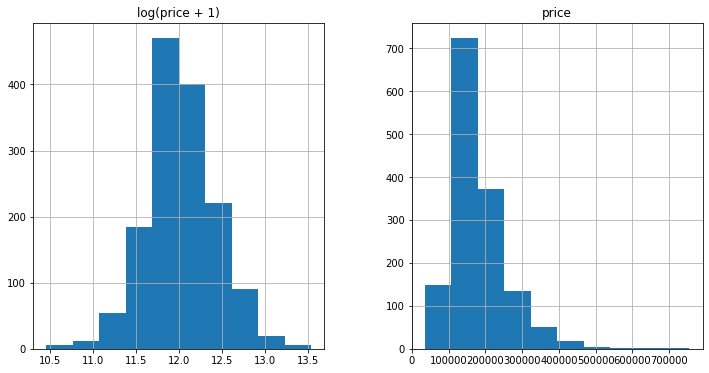

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [ ]:
In the above cell
It is clear that transforming the skewed numeric features by taking log(feature + 1) has made the features more normal




In [7]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
train_numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[train_numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,2.583824
1,2,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,2.573300
2,3,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,2.589054
3,4,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,2.553297
4,5,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,2.597433


In [9]:
train = pd.get_dummies(train)

In [10]:
#filling NA's with the mean of the column:
train = train.fillna(train.mean())

In [11]:
# Because I am just filling in the missing values using mean of the column, I decided to transform the train and test sets 
# differently. That way I can assure that I am not leaking the test data into the training dataset.

# Now on to transform the test set

# Since there is no target column in the test set there is no need for transformation of y column

#log transform skewed numeric features:
test_numeric_feats = test.dtypes[test.dtypes != "object"].index
print(test_numeric_feats)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [12]:
test_skewed_feats = test[test_numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = test_skewed_feats[test_skewed_feats > 0.75]
skewed_feats = skewed_feats.index

test[skewed_feats] = np.log1p(test[skewed_feats])




In [13]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.044522,RH,80.0,9.360741,Pave,NaN,Reg,Lvl,AllPub,...,4.795791,0.0,NaN,MnPrv,NaN,0.000000,6,2010,WD,Normal
1,1462,3.044522,RL,81.0,9.565775,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,NaN,Gar2,9.433564,6,2010,WD,Normal
2,1463,4.110874,RL,74.0,9.534668,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,MnPrv,NaN,0.000000,3,2010,WD,Normal
3,1464,4.110874,RL,78.0,9.208238,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,NaN,NaN,0.000000,6,2010,WD,Normal
4,1465,4.795791,RL,43.0,8.518392,Pave,NaN,IR1,HLS,AllPub,...,4.976734,0.0,NaN,NaN,NaN,0.000000,1,2010,WD,Normal


In [14]:
test = pd.get_dummies(test)

In [15]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.044522,80.0,9.360741,5,6,1961,1961,0.000000,6.150603,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.044522,81.0,9.565775,6,6,1958,1958,4.691348,6.828712,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.110874,74.0,9.534668,5,5,1997,1998,0.000000,6.674561,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.110874,78.0,9.208238,6,6,1998,1998,3.044522,6.401917,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.795791,43.0,8.518392,8,5,1992,1992,0.000000,5.575949,...,0,0,0,1,0,0,0,0,1,0


In [20]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [16]:
#filling NA's with the mean of the column:
test = test.fillna(test.mean())

In [17]:
# splitting the training dataset into X_train and y_train

y_train=train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)

In [19]:
X_train=train

In [21]:
X_test=test

In [23]:
# creating models from sklearn

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [24]:
model_ridge = Ridge()

In [ ]:
The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our 
model is. The higher the regularization the less prone our model will be to overfit. However it will also lose 
flexibility and might not capture all of the signal in the data.



In [25]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [26]:
cv_ridge

[0.010746492220668659,
 0.010652951215015631,
 0.010431419408508304,
 0.010140936003105623,
 0.009931368321251886,
 0.009871543536377689,
 0.009842312923316283,
 0.009862046341123237,
 0.009978885876681368,
 0.010138606741948143,
 0.010306830832571431]

Text(0, 0.5, 'rmse')

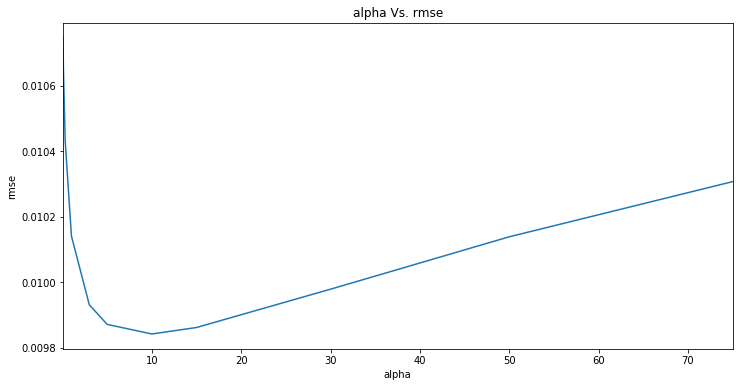

In [27]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "alpha Vs. rmse")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot
capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins
to overfit.
A value of alpha = 10 is about right based on the plot above.

In [28]:
cv_ridge.min()

0.009842312923316283

In [ ]:
Let try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure
out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [33]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 0.5, 0.3, 0.0005, 0.002, 0.0007]).fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [34]:
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

0.00973362981589293

In [ ]:
The lasso performs even better so we will just use this one to predict on the test set. Another neat thing about
the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero.
Let us take a look at the coefficients:

In [35]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [36]:
coef

Id                      -6.993302e-07
MSSubClass              -9.169079e-04
LotFrontage              0.000000e+00
LotArea                  5.558827e-03
OverallQual              4.883946e-03
                             ...     
SaleCondition_AdjLand    0.000000e+00
SaleCondition_Alloca    -0.000000e+00
SaleCondition_Family    -0.000000e+00
SaleCondition_Normal     0.000000e+00
SaleCondition_Partial    0.000000e+00
Length: 289, dtype: float64

In [37]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 69 variables and eliminated the other 220 variables


In [ ]:
One thing to note here however is that the features selected are not necessarily the "correct" ones - especially 
since there are a lot of collinear features in this dataset.
One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

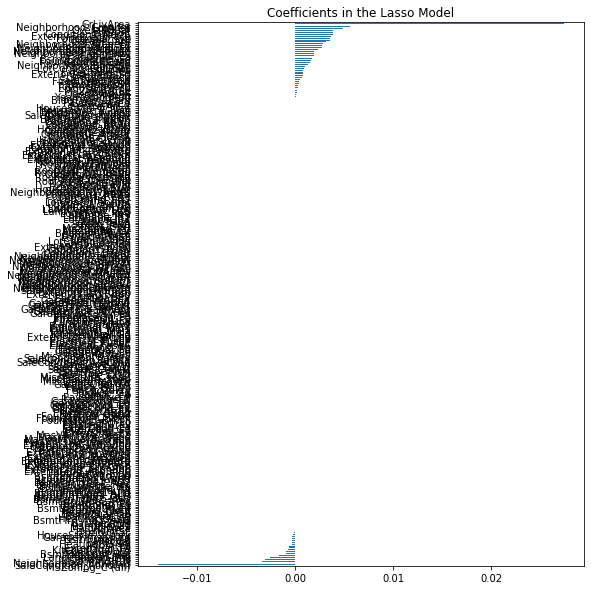

In [39]:
#We can also take a look directly at what the most important coefficients are:

imp_coef = pd.concat([coef.sort_values()])
                      
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


In [40]:
# because there are many features, let us just plot the top 10 and bottom 10 features

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

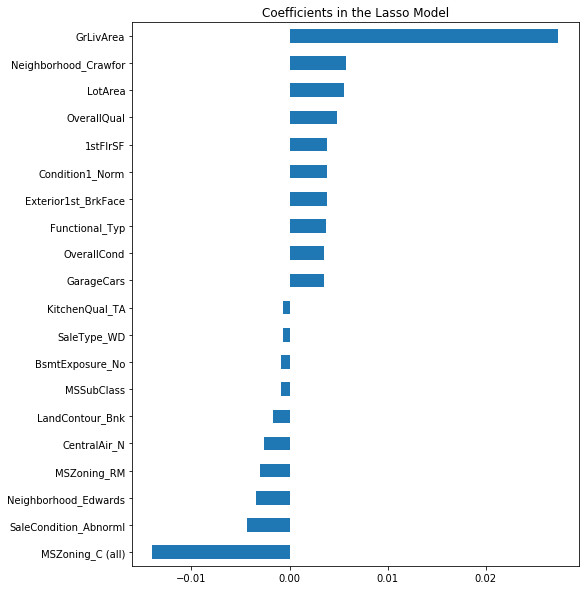

In [41]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely sense.
Then a few other location and quality features contributed positively. Some of the negative features make less sense
and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you would get from a random forest these are actual coefficients in your 
model - so you can say precisely why the predicted price is what it is.
The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are
a bit hard to interpret.

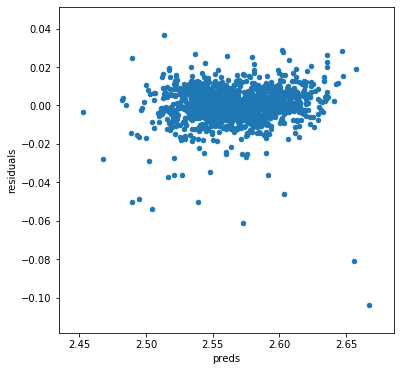

In [42]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [58]:
# Adding an xgboost model:
# Let's add an xgboost model to our linear model to see if we can improve our score:

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libgomp.so for UNIX-like OSes)
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/usr/local/lib/python3.7/site-packages/xgboost/./lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/gcc@8/lib/gcc/8/libgomp.1.dylib\n  Referenced from: /usr/local/lib/python3.7/site-packages/xgboost/./lib/libxgboost.dylib\n  Reason: image not found']


In [49]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [50]:
X_train = StandardScaler().fit_transform(X_train)

In [52]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state = 3)

In [53]:
X_tr.shape

(1095, 289)

In [54]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=289, kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 290       
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [56]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/1
1095/1095 [==============================] - 0s 132us/step - loss: 8.0980 - val_loss: 8.4736


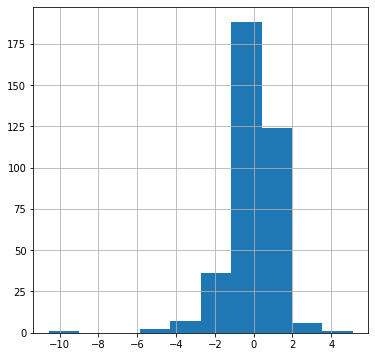

In [57]:
Feedforward Neural Nets does not seem to work well at all
pd.Series(model.predict(X_val)[:,0]).hist()